NumPy, Pandas & Matplotlib Integration

In [1]:
!unzip globalpowerplantdatabasev130.zip

Archive:  globalpowerplantdatabasev130.zip
  inflating: A_Global_Database_of_Power_Plants.pdf  
  inflating: Estimating_Power_Plant_Generation_in_the_Global_Power_Plant_Database.pdf  
  inflating: global_power_plant_database.csv  
  inflating: README.txt              
  inflating: RELEASE_NOTES.txt       


In [92]:
import pandas as pd

df = pd.read_csv('global_power_plant_database.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34936 entries, 0 to 34935
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         34936 non-null  object 
 1   country_long                    34936 non-null  object 
 2   name                            34936 non-null  object 
 3   gppd_idnr                       34936 non-null  object 
 4   capacity_mw                     34936 non-null  float64
 5   latitude                        34936 non-null  float64
 6   longitude                       34936 non-null  float64
 7   primary_fuel                    34936 non-null  object 
 8   other_fuel1                     1944 non-null   object 
 9   other_fuel2                     276 non-null    object 
 10  other_fuel3                     92 non-null     object 
 11  commissioning_year              17447 non-null  float64
 12  owner                           

<ipython-input-92-140784ee4919>:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('global_power_plant_database.csv')


In [93]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
print(df.head(3))

  country country_long                                          name     gppd_idnr  capacity_mw  \
0     AFG  Afghanistan  Kajaki Hydroelectric Power Plant Afghanistan  GEODB0040538         33.0   
1     AFG  Afghanistan                                  Kandahar DOG    WKS0070144         10.0   
2     AFG  Afghanistan                                  Kandahar JOL    WKS0071196         10.0   

   latitude  longitude primary_fuel other_fuel1 other_fuel2 other_fuel3  commissioning_year owner  \
0    32.322     65.119        Hydro         NaN         NaN         NaN                 NaN   NaN   
1    31.670     65.795        Solar         NaN         NaN         NaN                 NaN   NaN   
2    31.623     65.792        Solar         NaN         NaN         NaN                 NaN   NaN   

       source                                 url geolocation_source  wepp_id  \
0       GEODB  http://globalenergyobservatory.org              GEODB  1009793   
1  Wiki-Solar          https://www.w

In [94]:
df_clean = df.drop(columns=['generation_data_source','country_long','gppd_idnr','estimated_generation_note_2013','estimated_generation_note_2014','estimated_generation_note_2015','estimated_generation_note_2016','estimated_generation_note_2017','year_of_capacity_data', 'geolocation_source', 'source', 'url', 'wepp_id', 'owner','other_fuel1', 'other_fuel2', 'other_fuel3'])


In [95]:
df_clean['generation_gwh_2013'].fillna(0, inplace=True)
df_clean['generation_gwh_2014'].fillna(0, inplace=True)
df_clean['generation_gwh_2015'].fillna(0, inplace=True)
df_clean['generation_gwh_2016'].fillna(0, inplace=True)
df_clean['generation_gwh_2017'].fillna(0, inplace=True)
df_clean['generation_gwh_2018'].fillna(0, inplace=True)
df_clean['generation_gwh_2019'].fillna(0, inplace=True)
df_clean['estimated_generation_gwh_2013'].fillna(0, inplace=True)
df_clean['estimated_generation_gwh_2014'].fillna(0, inplace=True)
df_clean['estimated_generation_gwh_2015'].fillna(0, inplace=True)
df_clean['estimated_generation_gwh_2016'].fillna(0, inplace=True)
df_clean['estimated_generation_gwh_2017'].fillna(0, inplace=True)

<ipython-input-95-123d5510ee57>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['generation_gwh_2013'].fillna(0, inplace=True)
<ipython-input-95-123d5510ee57>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

In [96]:
df_clean['commissioning_year'] = pd.to_datetime(df_clean['commissioning_year'], format='%Y', errors='coerce')

In [97]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34936 entries, 0 to 34935
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   country                        34936 non-null  object        
 1   name                           34936 non-null  object        
 2   capacity_mw                    34936 non-null  float64       
 3   latitude                       34936 non-null  float64       
 4   longitude                      34936 non-null  float64       
 5   primary_fuel                   34936 non-null  object        
 6   commissioning_year             17447 non-null  datetime64[ns]
 7   generation_gwh_2013            34936 non-null  float64       
 8   generation_gwh_2014            34936 non-null  float64       
 9   generation_gwh_2015            34936 non-null  float64       
 10  generation_gwh_2016            34936 non-null  float64       
 11  generation_gwh_

In [98]:
df_clean.head()

,country,name,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017
0,AFG,Kajaki Hydroelectric Power Plant Afghanistan,33.0,32.322,65.1190,Hydro,NaT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123.77,162.90,97.39,137.76,119.50
1,AFG,Kandahar DOG,10.0,31.670,65.7950,Solar,NaT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.43,17.48,18.25,17.70,18.29
2,AFG,Kandahar JOL,10.0,31.623,65.7920,Solar,NaT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.64,17.58,19.10,17.62,18.72
3,AFG,Mahipar Hydroelectric Power Plant Afghanistan,66.0,34.556,69.4787,Hydro,NaT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,225.06,203.55,146.90,230.18,174.91
4,AFG,Naghlu Dam Hydroelectric Power Plant Afghanistan,100.0,34.641,69.7170,Hydro,NaT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,406.16,357.22,270.99,395.38,350.80


In [99]:
df_clean.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017
count,34936.000000,34936.000000,34936.000000,17447,34936.000000,34936.000000,34936.000000,34936.000000,34936.000000,34936.000000,34936.000000,34936.000000,34936.000000,34936.000000,34936.000000,34936.000000
mean,163.355148,32.816637,-6.972803,1997-05-10 23:08:00.151315584,108.865666,135.862677,179.004797,181.422070,179.969788,142.701523,117.204798,110.330003,114.519144,115.110958,118.535774,679.571235
min,1.000000,-77.847000,-179.977700,1896-01-01 00:00:00,-947.600000,-989.619000,-864.428000,-768.620000,-934.944000,-982.622000,-780.339000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.900000,29.256475,-77.641550,1988-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.820000
50%,16.745000,39.727750,-2.127100,2007-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.330000,32.475000
75%,75.344250,46.263125,49.502675,2014-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.114250,21.592500,23.492500,24.720000,28.040000,195.640000
max,22500.000000,71.292000,179.388700,2020-01-01 00:00:00,50834.000000,32320.917000,37433.607000,32377.477000,36448.643000,35136.000000,31920.368000,48675.060000,58470.770000,57113.350000,60859.730000,82810.770000
std,489.636072,22.638603,78.405850,NaN,959.867513,1049.093115,1269.384526,1267.279351,1270.071080,1062.866856,912.965076,817.911666,891.961731,892.928446,900.967741,2424.758039


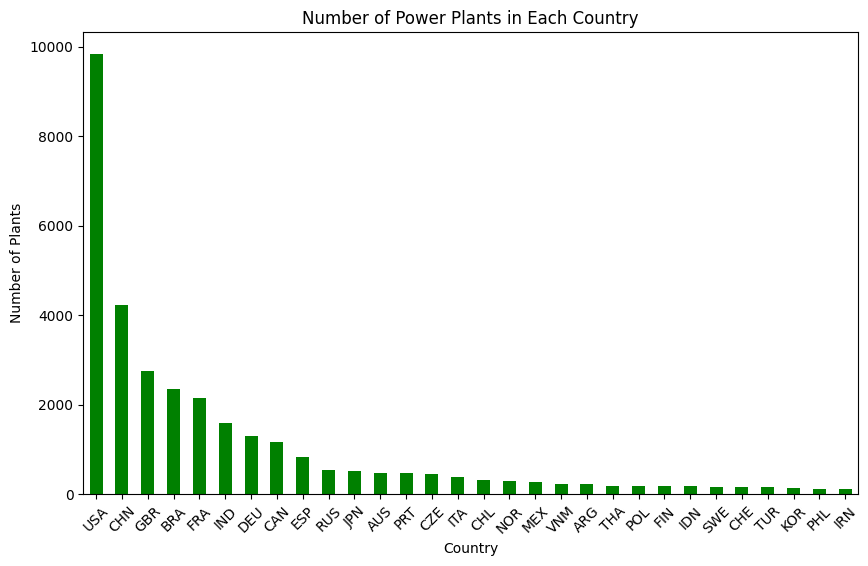

In [100]:
plants_in_country = df_clean['country'].value_counts()
distrinution_top_30 = plants_in_country.head(30)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
distrinution_top_30.plot(kind='bar', color= 'green')
plt.xlabel('Country')
plt.ylabel('Number of Plants')
plt.title('Number of Power Plants in Each Country')
plt.xticks(rotation=45)
plt.show()

By a large margin, the largest number of power plants are located in the United States, as well as in large countries that require large amounts of energy - China, Great Britain, Brazil, France, India, Germany, Canada, Spain and Russia. This is also due to the economic capabilities of these countries to build a large number of power plants. However, different types of fuel require different amounts of infrastructure investment to produce, and even a small number of coal plants in China, for example, can produce up to much more energy than wind and solar plants in the USA.

Text(0.5, 1.0, 'Distribution of Power Plants by Fuel type')

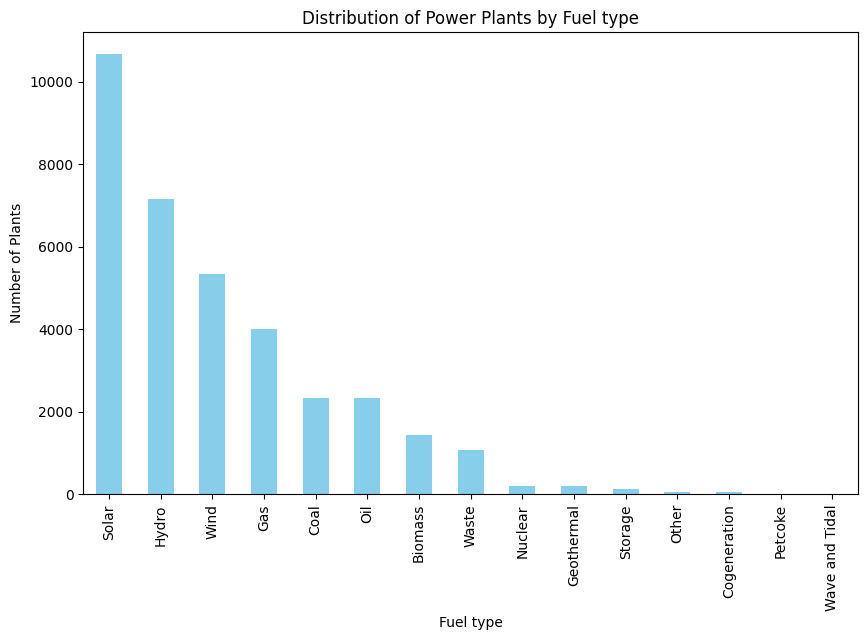

In [101]:
fuel_country = df_clean['primary_fuel'].value_counts()

plt.figure(figsize=(10, 6))
fuel_country.plot(kind='bar', color= 'skyblue')
plt.xlabel('Fuel type')
plt.ylabel('Number of Plants')
plt.title('Distribution of Power Plants by Fuel type')

Here we see that due to the low amount of energy produced, the required number of power plants for stable operation increases greatly. This explains the dominance of such fuel types as solar, hydro and wind in total amount of all plants.

In [102]:
df_clean['total_output'] = df_clean[['generation_gwh_2013','generation_gwh_2014',
                                    'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017']].sum(axis=1)
fuel_power = df_clean.groupby('primary_fuel')['total_output']

mean_power = fuel_power.mean()
median_power = fuel_power.median()
std_power = fuel_power.std()

print("Mean output:")
print(mean_power)
print("\nMedian output:")
print(median_power)
print("\nStandard Deviation of output:")
print(std_power)

Mean output:
primary_fuel
Biomass              96.029417
Coal               4495.671444
Cogeneration        391.264428
Gas                1695.634981
Geothermal          425.662360
Hydro               322.320944
Nuclear           30578.362233
Oil                  72.215698
Other               235.734427
Petcoke            3309.620191
Solar                13.821969
Storage              33.842985
Waste               200.141488
Wave and Tidal        0.000000
Wind                203.745655
Name: total_output, dtype: float64

Median output:
primary_fuel
Biomass               0.000000
Coal                  0.000000
Cogeneration         51.959810
Gas                   0.000000
Geothermal            0.000000
Hydro                 0.000000
Nuclear           22738.813000
Oil                   0.000000
Other                 0.000000
Petcoke             145.156145
Solar                 0.000000
Storage               0.000000
Waste                 0.000000
Wave and Tidal        0.000000
Wind       

which, in fact, is what we are seeing here. A small number of nuclear stations produce many times more energy than any other type. However, this is known to be the most expensive source of energy to create and maintain, inaccessible to many countries. This is why gas and coal are so popular because they are easier to extract, process and use as an energy source. They are relatively cheap and productive, but are dangerous for the environment. This is why there are such a large number of solar, hydro and wind stations.

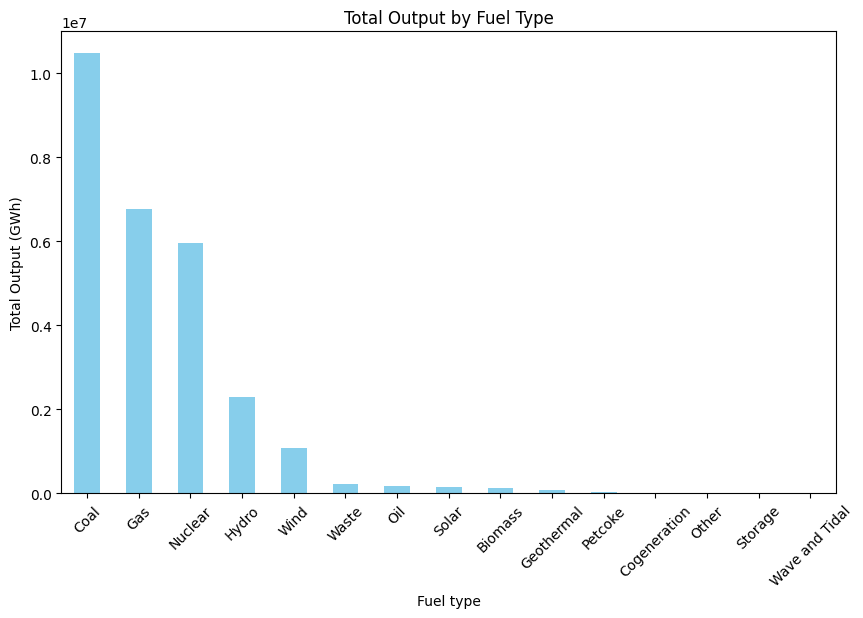

In [103]:
total_output = df_clean.groupby('primary_fuel')['total_output'].sum()
total_sorted = total_output.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
total_sorted.plot(kind='bar', color= 'skyblue')
plt.xlabel('Fuel type')
plt.ylabel('Total Output (GWh)')
plt.title('Total Output by Fuel Type')
plt.xticks(rotation=45)
plt.show()

the greatest amount of energy was produced by the most productive types of fuel - coal, gas and nuclear

In [104]:
# null hypothesis: mean power output is the same for different fuel types
# alternative hypothesis: mean power output differs between different fuel types
from scipy import stats
fuel_group = df_clean.groupby('primary_fuel').agg(list)
f_stat, p_value = stats.f_oneway(*fuel_group['total_output'])
print("F-statistic:", f_stat)
print("p-value:", p_value)
if p_value < 0.05:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

F-statistic: 718.5558313214328
p-value: 0.0
Reject the null hypothesis


depending on the number of plants and the amount of energy they generate, the average production rate differs for each type of fuel, which was proven when testing the hypothesis

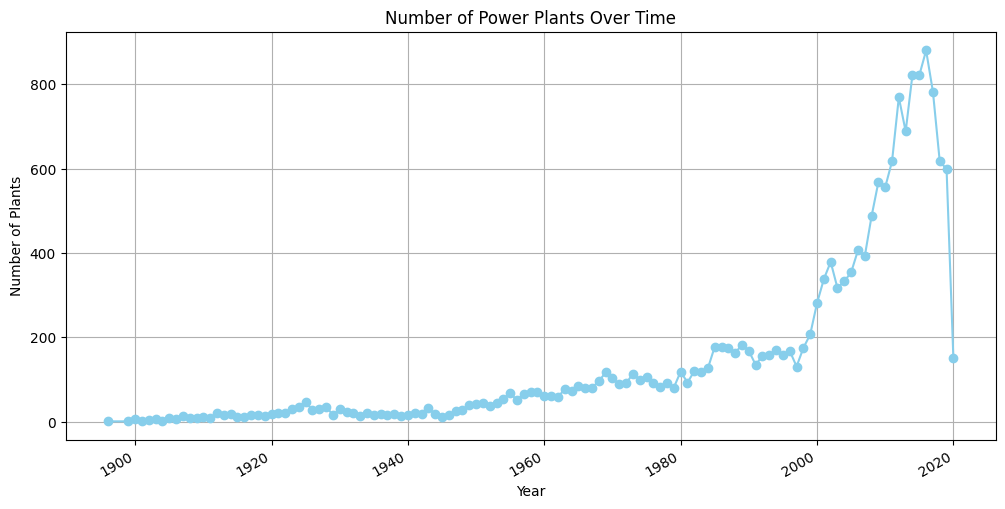

In [105]:
# time series analysis
df_clean= df_clean[df_clean['commissioning_year'].notna()]
plants_year = df_clean.groupby('commissioning_year').size()

plt.figure(figsize=(12, 6))
plants_year.plot(kind='line', color= 'skyblue', marker= 'o', label='Number of plants')
plt.xlabel('Year')
plt.ylabel('Number of Plants')
plt.title('Number of Power Plants Over Time')
plt.grid(True)
plt.show()

With the growth of population, economy and technical progress over the world, the need for energy increased, especially, at the peak - industry revolution and the discovery of new types of fuel. From the end of the 1990s to the mid-2010s, the greatest increase in the number of power plants was observed.

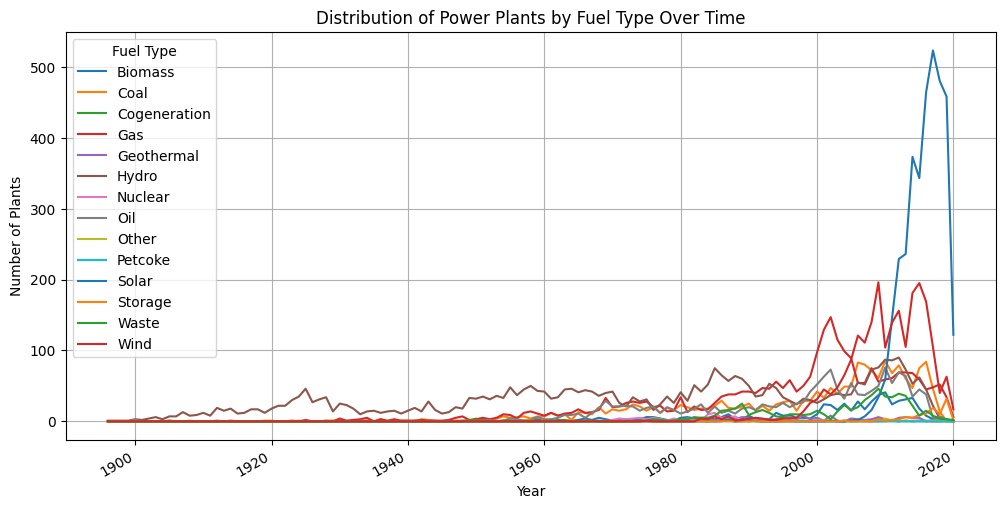

In [106]:
power_type_distribution = df_clean.groupby(['commissioning_year', 'primary_fuel']).size().unstack(fill_value=0)

power_type_distribution.plot(kind='line', figsize=(12, 6))
plt.xlabel('Year')
plt.ylabel('Number of Plants')
plt.title('Distribution of Power Plants by Fuel Type Over Time')
plt.legend(title='Fuel Type')
plt.grid(True)
plt.show()

For a long time, hydro-type stations prevailed; their spread slowed down and they were replaced by stations using gas and biomass, which spread sharply after the beginning of 2000

In [113]:
import plotly.express as px

df_clean = df_clean[df_clean['latitude'].notna() & df_clean['longitude'].notna()]

fig = px.scatter_geo(
    df_clean,
    lat='latitude',
    lon='longitude',
    color='primary_fuel',
    hover_name='name',
    projection='natural earth',
    title='Power Plants in the World'
)
fig.show()

here we can observe in which countries and on which continents certain types of fuel predominate due to their availability in these regions. The location of the necessary resources forms huge clusters of power plants, and vice versa there are places in which there are no production stations at all.

In [133]:
capacity_by_fuel = df_clean.groupby('primary_fuel')['capacity_mw'].sum().astype(int)

matrix_capacity = {
    'Total Capacity': capacity_by_fuel,
    'Mean Capacity': df_clean.groupby('primary_fuel')['capacity_mw'].mean().astype(int),
    'Max Capacity': df_clean.groupby('primary_fuel')['capacity_mw'].max().astype(int),
    'Min Capacity': df_clean.groupby('primary_fuel')['capacity_mw'].min().astype(int)
}
matrix_capacity = pd.DataFrame(matrix_capacity).fillna(0)

print(matrix_capacity)

              Total Capacity  Mean Capacity  Max Capacity  Min Capacity
primary_fuel                                                           
Biomass                20713             35           528             1
Coal                 1722337            907          7000             1
Cogeneration            1042             30           135             1
Gas                   965405            351          8865             1
Geothermal              7435             51          1163             1
Hydro                 604220            159         22500             1
Nuclear               155062           1582          4209           100
Oil                   123483             77          6794             1
Other                   2690             96           845             4
Petcoke                 2361            214          1707             4
Solar                  44984             12           585             1
Storage                  815              7            40       

we can highlight gas and coal as fuels that have the greatest mean potential for energy production, not depending on a large number of factors, such as solar or wind plants. This is why these types of energy are so popular, creating a virtually uninterrupted energy network. It is also possible to distinguish hydro fuel, which have the highest production value, but require ideal conditions for this. At the same time, we see that the average for hydro fuel remains at a rather low level compared to other types of fuel

In [134]:
correlation = matrix_capacity.corr()
print(correlation)

                Total Capacity  Mean Capacity  Max Capacity  Min Capacity
Total Capacity        1.000000       0.437638      0.521104     -0.076446
Mean Capacity         0.437638       1.000000      0.184789      0.848988
Max Capacity          0.521104       0.184789      1.000000      0.004704
Min Capacity         -0.076446       0.848988      0.004704      1.000000


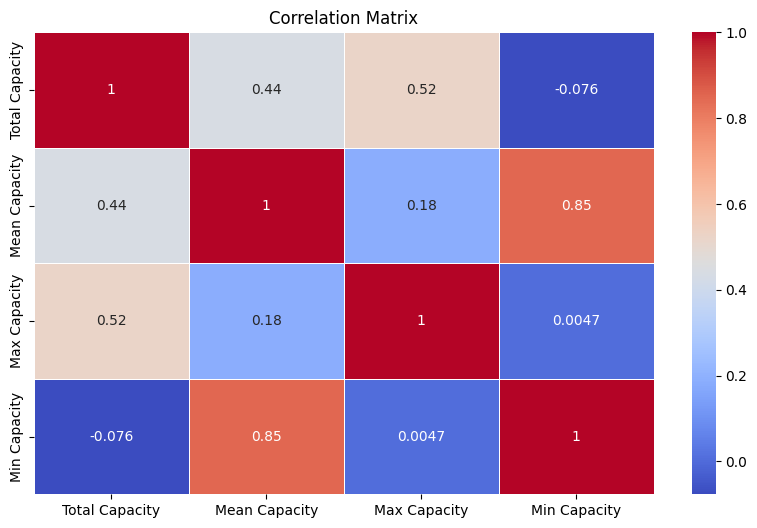

In [135]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

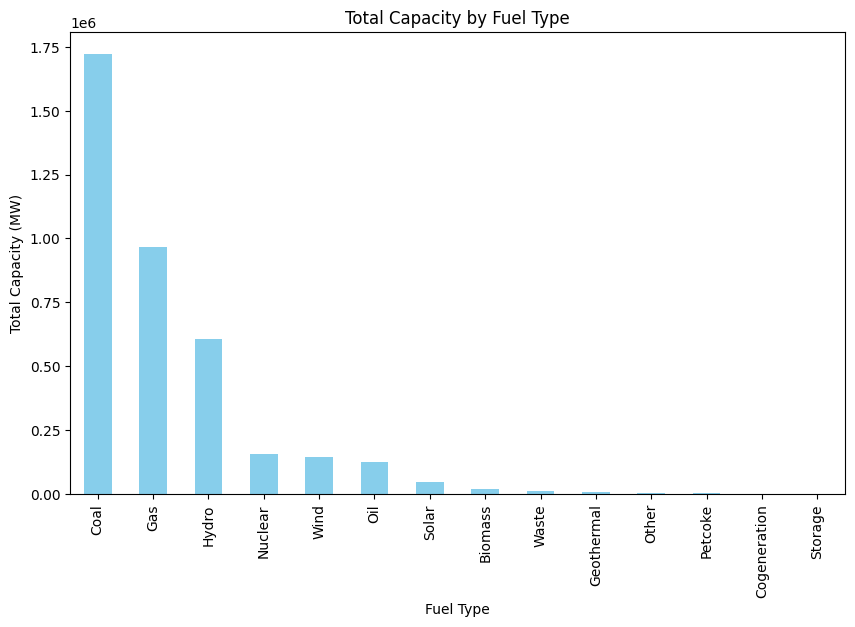

In [136]:
matrix_capacity['Total Capacity'].sort_values(ascending=False).plot(
    kind='bar',
    color= 'skyblue',
    title='Total Capacity by Fuel Type',
    figsize=(10,6)
)
plt.xlabel('Fuel Type')
plt.ylabel('Total Capacity (MW)')
plt.show()

If we consider the total number of power plants in the world, then under ideal conditions coal, gas and hydro will show the greatest productivity. We can conclude that despite humanity's desire for “clean” energy sources, taking into account current needs, this transition is still hardly possible. Only the invention of a fundamentally new type of fuel can change this situation, since at present, clean energy sources will not cover the needs, even if the entire surface of our planet will be built up with them.